In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Description

In [2]:
train_df = pd.read_csv("Train_pjb2QcD.csv")
test_df = pd.read_csv("Test_wyCirpO.csv")
train_df.head()
# train_df['Applicant_City_PIN'].value_counts()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [3]:
train_df.shape

(9527, 23)

In [4]:
train_df.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [5]:
train_df.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [6]:
train_df[['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']]=train_df.loc[:,['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']].apply(pd.to_datetime,errors='ignore')
test_df[['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']]=test_df.loc[:,['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB']].apply(pd.to_datetime,errors='ignore')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
ID                             9527 non-null object
Office_PIN                     9527 non-null int64
Application_Receipt_Date       9527 non-null datetime64[ns]
Applicant_City_PIN             9430 non-null float64
Applicant_Gender               9460 non-null object
Applicant_BirthDate            9454 non-null datetime64[ns]
Applicant_Marital_Status       9454 non-null object
Applicant_Occupation           8306 non-null object
Applicant_Qualification        9441 non-null object
Manager_DOJ                    8844 non-null datetime64[ns]
Manager_Joining_Designation    8844 non-null object
Manager_Current_Designation    8844 non-null object
Manager_Grade                  8844 non-null float64
Manager_Status                 8844 non-null object
Manager_Gender                 8844 non-null object
Manager_DoB                    8844 non-null datetime64[ns]
Manager_Num_Application     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99dd1a1c50>,
      dtype=object)

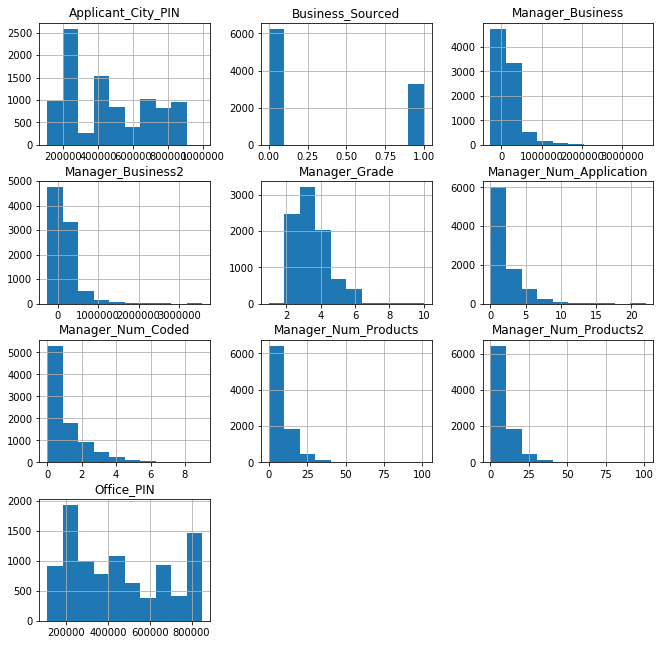

In [8]:
train_df[train_df.dtypes[(train_df.dtypes=="float64")|(train_df.dtypes=="int64")].index.values].hist(figsize=(11,11))

In [9]:
train_df.corr()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
Office_PIN,1.000000,0.977756,-0.077063,0.061672,0.066030,0.093603,0.132186,0.093386,0.131747,0.027682
Applicant_City_PIN,0.977756,1.000000,-0.091697,0.055152,0.060603,0.089794,0.131358,0.089425,0.130928,0.028036
Manager_Grade,-0.077063,-0.091697,1.000000,-0.022524,-0.002833,0.322211,0.210353,0.320644,0.209886,0.059363
Manager_Num_Application,0.061672,0.055152,-0.022524,1.000000,0.514299,0.014605,-0.030293,0.015871,-0.029977,-0.037593
Manager_Num_Coded,0.066030,0.060603,-0.002833,0.514299,1.000000,0.152858,0.129490,0.155289,0.130039,0.013565
Manager_Business,0.093603,0.089794,0.322211,0.014605,0.152858,1.000000,0.733880,0.994422,0.729147,0.031578
Manager_Num_Products,0.132186,0.131358,0.210353,-0.030293,0.129490,0.733880,1.000000,0.736272,0.998893,-0.011000
Manager_Business2,0.093386,0.089425,0.320644,0.015871,0.155289,0.994422,0.736272,1.000000,0.735594,0.031093
Manager_Num_Products2,0.131747,0.130928,0.209886,-0.029977,0.130039,0.729147,0.998893,0.735594,1.000000,-0.011706
Business_Sourced,0.027682,0.028036,0.059363,-0.037593,0.013565,0.031578,-0.011000,0.031093,-0.011706,1.000000


In [10]:
print(train_df['Manager_Joining_Designation'].value_counts())

Level 1    4632
Level 2    2787
Level 3    1146
Level 4     200
Other        58
Level 6      18
Level 7       2
Level 5       1
Name: Manager_Joining_Designation, dtype: int64


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
ID                             9527 non-null object
Office_PIN                     9527 non-null int64
Application_Receipt_Date       9527 non-null datetime64[ns]
Applicant_City_PIN             9430 non-null float64
Applicant_Gender               9460 non-null object
Applicant_BirthDate            9454 non-null datetime64[ns]
Applicant_Marital_Status       9454 non-null object
Applicant_Occupation           8306 non-null object
Applicant_Qualification        9441 non-null object
Manager_DOJ                    8844 non-null datetime64[ns]
Manager_Joining_Designation    8844 non-null object
Manager_Current_Designation    8844 non-null object
Manager_Grade                  8844 non-null float64
Manager_Status                 8844 non-null object
Manager_Gender                 8844 non-null object
Manager_DoB                    8844 non-null datetime64[ns]
Manager_Num_Application     

In [12]:
train_df['Applicant_City_PIN']=train_df['Applicant_City_PIN'].fillna(value=202001)
test_df['Applicant_City_PIN'] = test_df['Applicant_City_PIN'].fillna(value=202001)

In [13]:
train_df['Applicant_Gender'].value_counts()

M    7179
F    2281
Name: Applicant_Gender, dtype: int64

In [14]:
train_df['Applicant_Gender']=train_df['Applicant_Gender'].fillna(value='NA')
test_df['Applicant_Gender']=test_df['Applicant_Gender'].fillna(value='NA')

In [15]:
train_df['Applicant_Age'] = train_df['Application_Receipt_Date'].dt.year - train_df['Applicant_BirthDate'].dt.year
train_df['Manager_Experience'] = train_df['Application_Receipt_Date'].dt.year - train_df['Manager_DOJ'].dt.year
test_df['Applicant_Age'] = test_df['Application_Receipt_Date'].dt.year - test_df['Applicant_BirthDate'].dt.year
test_df['Manager_Experience'] = test_df['Application_Receipt_Date'].dt.year - test_df['Manager_DOJ'].dt.year

train_df['Applicant_Age'] = train_df['Applicant_Age'].fillna(value=np.mean(train_df['Applicant_Age']))
test_df['Applicant_Age'] = test_df['Applicant_Age'].fillna(value=np.mean(test_df['Applicant_Age']))
train_df['Manager_Experience'] = train_df['Manager_Experience'].fillna(value=np.mean(train_df['Manager_Experience']))
test_df['Manager_Experience'] = test_df['Manager_Experience'].fillna(value=np.mean(test_df['Manager_Experience']))

In [16]:
# train_df['Applicant_BirthDate']=train_df['Applicant_BirthDate'].fillna(method='ffill')
# test_df['Applicant_BirthDate']=test_df['Applicant_BirthDate'].fillna(method='ffill')

In [17]:
# train_df['Application_Receipt_Date']=train_df['Application_Receipt_Date'].fillna(method='ffill')
# test_df['Application_Receipt_Date']=test_df['Application_Receipt_Date'].fillna(method='ffill')

In [18]:
train_df['Applicant_Marital_Status']=train_df['Applicant_Marital_Status'].fillna(value='M')
test_df['Applicant_Marital_Status']=test_df['Applicant_Marital_Status'].fillna(value='M')

In [19]:
train_df['Applicant_Occupation']=train_df['Applicant_Occupation'].fillna(value='Salaried')
test_df['Applicant_Occupation']=test_df['Applicant_Occupation'].fillna(value='Salaried')

In [20]:
# train_df[['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation']]=train_df[['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation']].fillna(method='ffill')
# test_df[['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation']]=test_df[['Manager_DOJ','Manager_Joining_Designation','Manager_Current_Designation']].fillna(method='ffill')

In [21]:
# train_df[['Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB']]=train_df[['Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB']].fillna(method='ffill')
# test_df[['Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB']]=test_df[['Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB']].fillna(method='ffill')
train_df['Manager_Current_Designation'] = train_df['Manager_Current_Designation'].fillna(value='Level 2')
train_df['Manager_Grade'] = train_df['Manager_Grade'].fillna(value=3.0)
train_df['Manager_Status'] = train_df['Manager_Status'].fillna(value='NA')
train_df['Manager_Gender'] = train_df['Manager_Gender'].fillna(value='M')
train_df['Mnager_Joining_Designation'] = train_df['Manager_Joining_Designation'].fillna('Level 1')

test_df['Manager_Current_Designation'] = test_df['Manager_Current_Designation'].fillna(value='Level 2')
test_df['Manager_Grade'] = test_df['Manager_Grade'].fillna(value=3.0)
test_df['Manager_Status'] = test_df['Manager_Status'].fillna(value='NA')
test_df['Manager_Gender'] = test_df['Manager_Gender'].fillna(value='M')

test_df['Mnager_Joining_Designation'] = test_df['Manager_Joining_Designation'].fillna('Level 1')


In [22]:
manager_business_median =  train_df['Manager_Business'].median()
train_df['Manager_Business']=train_df['Manager_Business'].fillna(manager_business_median)
manager_business_median =  test_df['Manager_Business'].median()
test_df['Manager_Business']=test_df['Manager_Business'].fillna(manager_business_median)

In [23]:
manager_business_median2 =  train_df['Manager_Business2'].median()
train_df['Manager_Business2']=train_df['Manager_Business2'].fillna(manager_business_median)
manager_business_median2 =  test_df['Manager_Business2'].median()
test_df['Manager_Business2']=test_df['Manager_Business2'].fillna(manager_business_median)

In [24]:
manager_products_median =  train_df['Manager_Num_Products'].median()
train_df['Manager_Num_Products']=train_df['Manager_Num_Products'].fillna(manager_products_median)
manager_products_median =  test_df['Manager_Num_Products'].median()
test_df['Manager_Num_Products']=test_df['Manager_Num_Products'].fillna(manager_products_median)

In [25]:
manager_products_median2 =  train_df['Manager_Num_Products2'].median()
train_df['Manager_Num_Products2']=train_df['Manager_Num_Products2'].fillna(manager_business_median2)
manager_products_median2 =  test_df['Manager_Num_Products2'].median()
test_df['Manager_Num_Products2']=test_df['Manager_Num_Products2'].fillna(manager_business_median2)

In [26]:
manager_num_application_median =  train_df['Manager_Num_Application'].median()
train_df['Manager_Num_Application']=train_df['Manager_Num_Application'].fillna(manager_num_application_median)
manager_num_application_median =  test_df['Manager_Num_Application'].median()
test_df['Manager_Num_Application']=test_df['Manager_Num_Application'].fillna(manager_num_application_median)

In [27]:
manager_num_coded_median =  train_df['Manager_Num_Coded'].median()
train_df['Manager_Num_Coded']=train_df['Manager_Num_Coded'].fillna(manager_num_coded_median)
manager_num_coded_median =  test_df['Manager_Num_Coded'].median()
test_df['Manager_Num_Coded']=test_df['Manager_Num_Coded'].fillna(manager_num_coded_median)

In [28]:
train_df['Applicant_Qualification'] = train_df['Applicant_Qualification'].fillna(value='NA')
test_df['Applicant_Qualification'] = test_df['Applicant_Qualification'].fillna(value='NA')

/home/lenovo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/lenovo/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/lenovo/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/lenovo/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

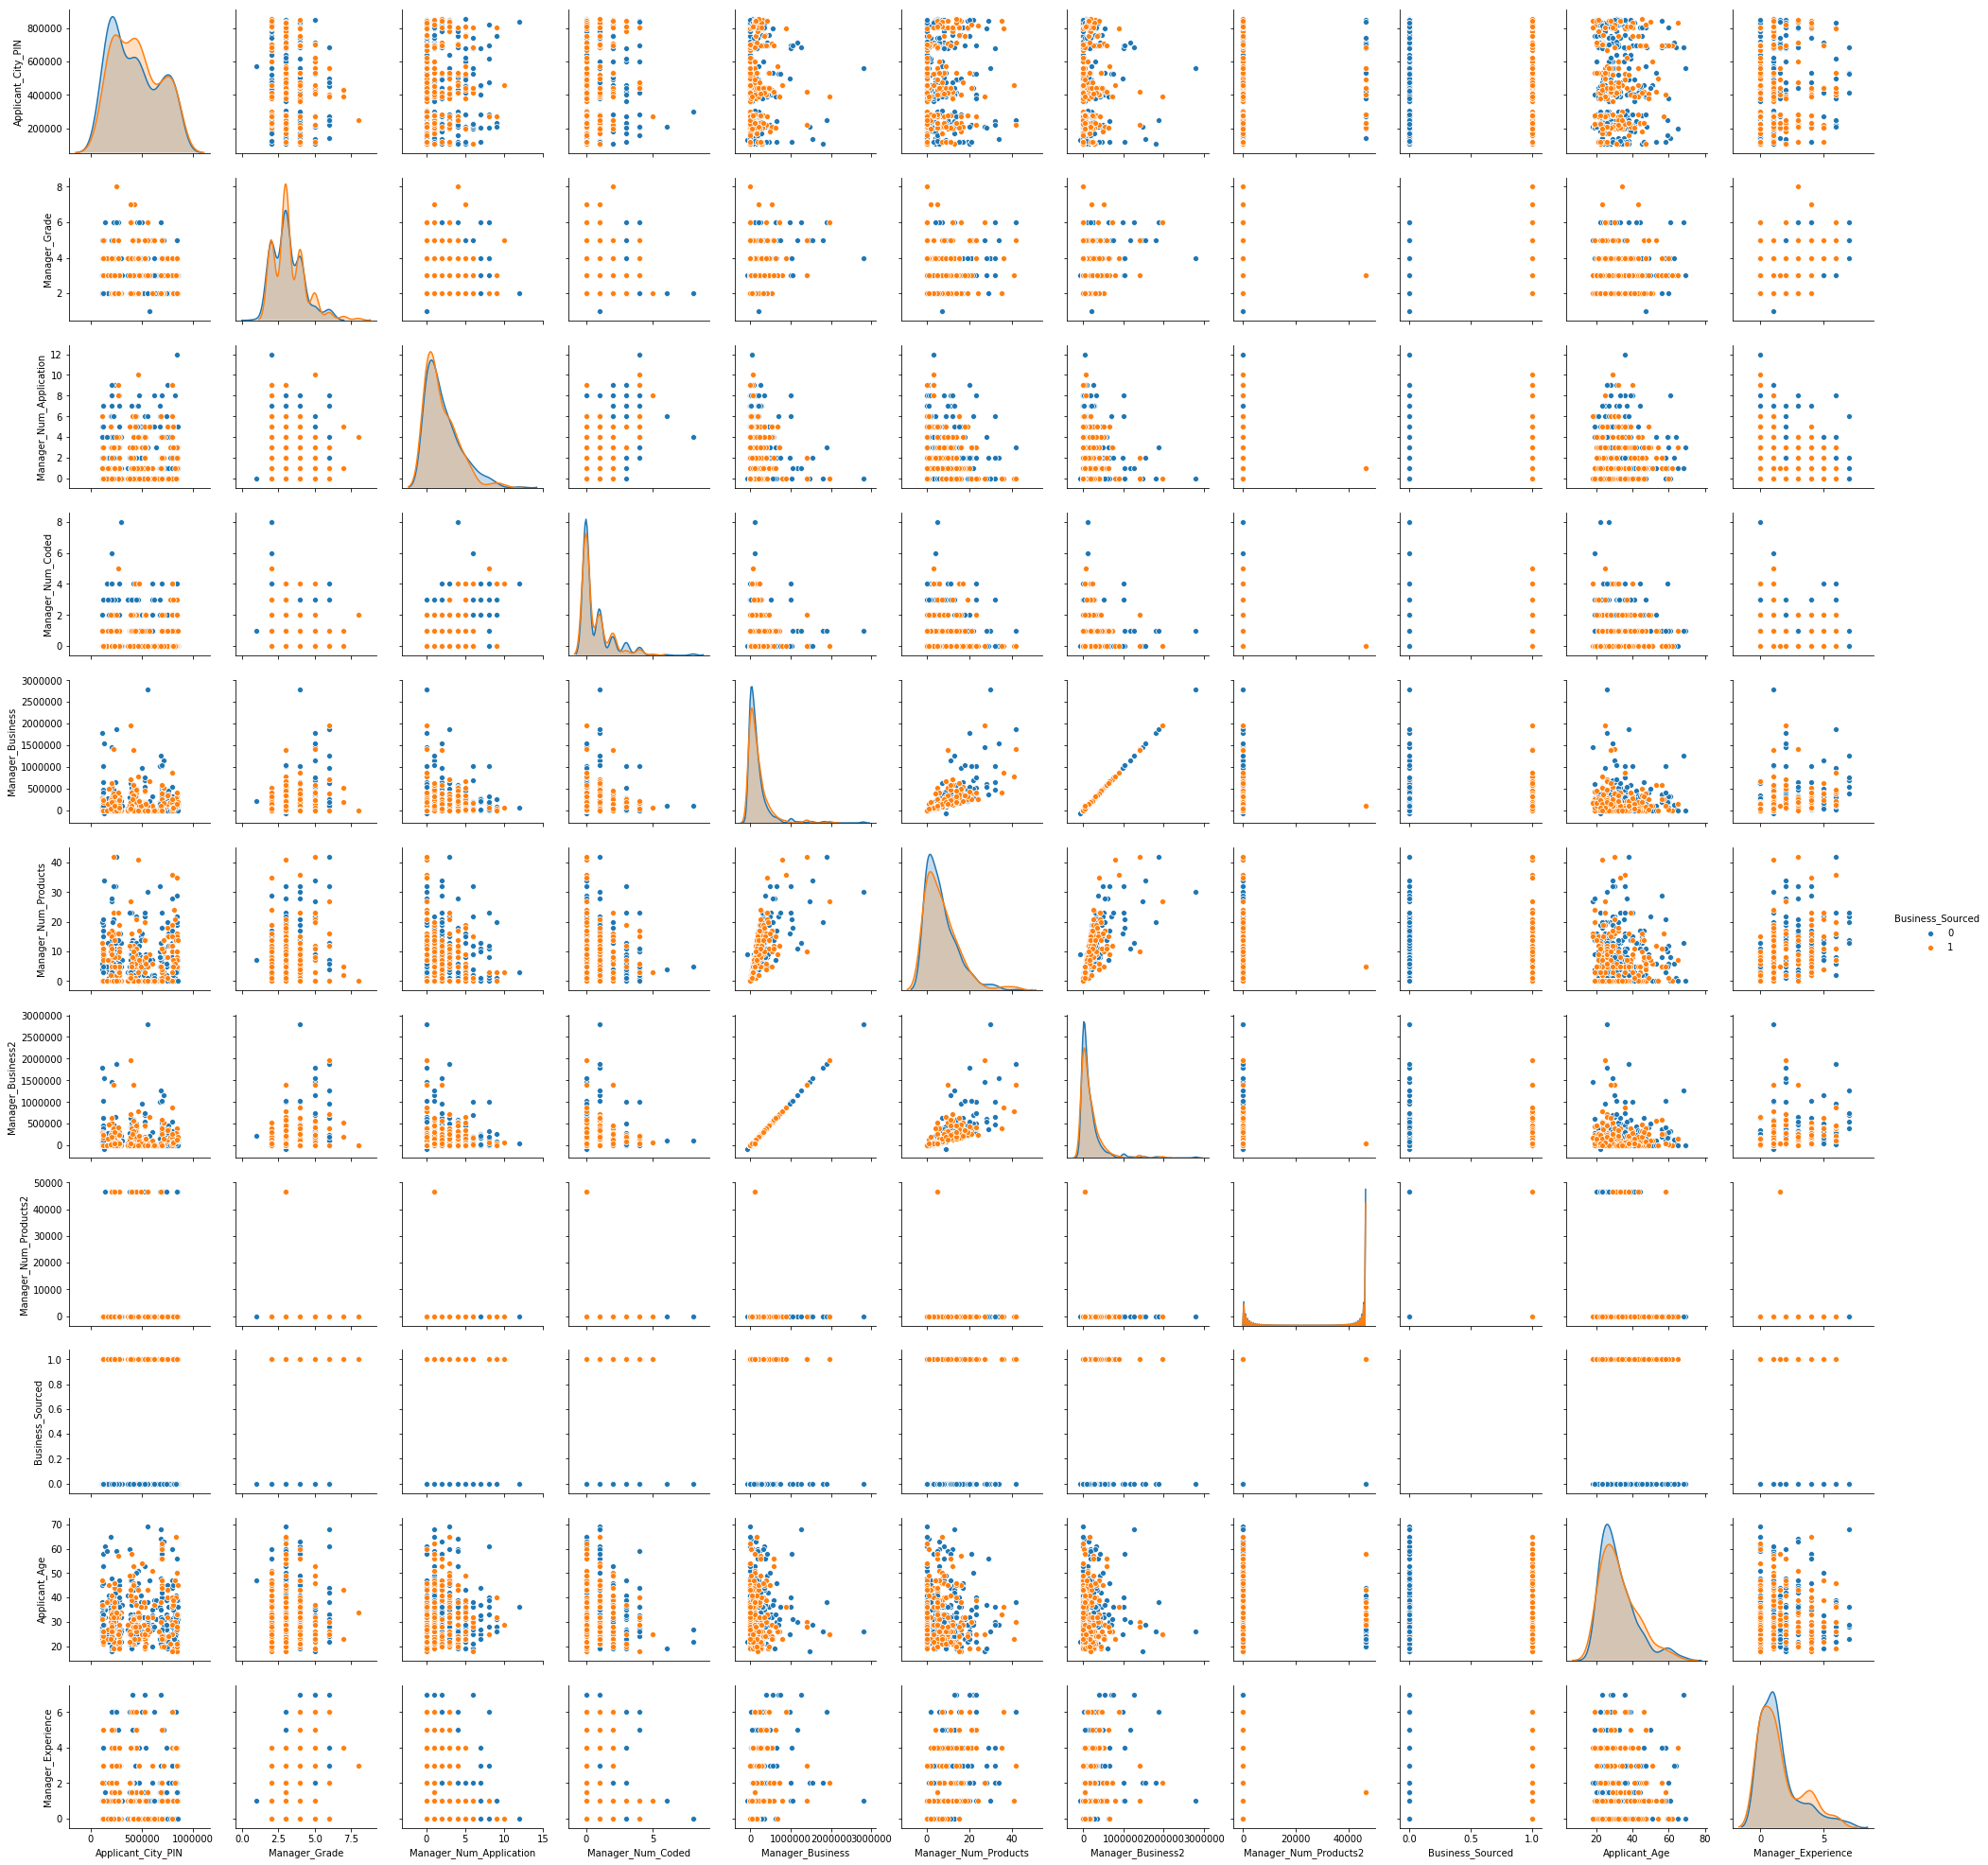

In [38]:
sns.pairplot(train_df.sample(n=500),hue='Business_Sourced')

In [29]:
train_ID = train_df['ID']
test_ID = test_df['ID']
train_df = train_df.drop(['ID','Office_PIN','Manager_Joining_Designation','Manager_Gender','Applicant_BirthDate','Application_Receipt_Date','Manager_DOJ','Manager_DoB'],axis=1)
test_df = test_df.drop(['ID','Office_PIN','Manager_Joining_Designation','Manager_Gender'],axis=1)
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 18 columns):
Applicant_City_PIN             9527 non-null float64
Applicant_Gender               9527 non-null object
Applicant_Marital_Status       9527 non-null object
Applicant_Occupation           9527 non-null object
Applicant_Qualification        9527 non-null object
Manager_Current_Designation    9527 non-null object
Manager_Grade                  9527 non-null float64
Manager_Status                 9527 non-null object
Manager_Num_Application        9527 non-null float64
Manager_Num_Coded              9527 non-null float64
Manager_Business               9527 non-null float64
Manager_Num_Products           9527 non-null float64
Manager_Business2              9527 non-null float64
Manager_Num_Products2          9527 non-null float64
Business_Sourced               9527 non-null int64
Applicant_Age                  9527 non-null float64
Manager_Experience             9527 non-null float64


In [30]:
# train_df = pd.get_dummies(train_df)
# test_df = pd.get_dummies(test_df)
# missing_cols = set( train_df.columns ) - set( test_df.columns)
# # Add a missing column in test set with default value equal to 0
# for c in missing_cols:
#     test_df[c] = 0
# test_df = test_df[train_df.columns]

# label = train_df.pop('Business_Sourced')
# x_train, x_test, y_train, y_test = train_test_split(train_df,label,test_size=0.50)
# # Add a missing column in test set with default value equal to 0

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
# use the  following command to make SMOTE work.
# conda install -c conda-forge imbalanced-learn

In [32]:
scaler = RobustScaler()
X = train_df.drop('Business_Sourced',axis=1)
target = train_df['Business_Sourced']
print(target.value_counts())
print(X.info())
X = pd.get_dummies(X)

X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X, target,test_size=0.25)

sm = SMOTE(random_state=2,ratio ='auto')
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
print("Random Forest Classifier===============================")
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(roc_auc_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print("Decision Tree Classifier===============================")
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(roc_auc_score(y_test,pred))
print(confusion_matrix(y_test,pred))

print("KNeighbors Classifier===============================")
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(roc_auc_score(y_test,pred))

print(confusion_matrix(y_test,pred))

criteria = ['gini','entropy']
splitter_val = ['best','random']
min_samples_split = [2, 5, 10,15,20,25,30]
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64]
max_features_val = ['auto','sqrt','log2']
presort_val = [True,False]
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion':criteria,
               'class_weight': ['balanced_subsample','balanced']
               
               }

reg = RandomForestClassifier(n_jobs=4)
rs_reg = RandomizedSearchCV(estimator = reg,param_distributions=random_grid, n_iter = 20, cv = 4,verbose=2,scoring='roc_auc')
rs_reg.fit(X_train,y_train)
print(rs_reg.best_params_)
pred = rs_reg.predict(X_test)
print(roc_auc_score(y_test,pred))


0    6260
1    3267
Name: Business_Sourced, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 17 columns):
Applicant_City_PIN             9527 non-null float64
Applicant_Gender               9527 non-null object
Applicant_Marital_Status       9527 non-null object
Applicant_Occupation           9527 non-null object
Applicant_Qualification        9527 non-null object
Manager_Current_Designation    9527 non-null object
Manager_Grade                  9527 non-null float64
Manager_Status                 9527 non-null object
Manager_Num_Application        9527 non-null float64
Manager_Num_Coded              9527 non-null float64
Manager_Business               9527 non-null float64
Manager_Num_Products           9527 non-null float64
Manager_Business2              9527 non-null float64
Manager_Num_Products2          9527 non-null float64
Applicant_Age                  9527 non-null float64
Manager_Experience             9527 non-null fl

/home/lenovo/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5416288765616981
[[1029  534]
 [ 471  348]]
KNeighbors Classifier===============================
0.5415058390106375
[[1229  334]
 [ 576  243]]
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   12.3s
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   12.8s finished


{'n_estimators': 67, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
0.5872840105085786


In [56]:
X_train = train_df.drop('Business_Sourced',axis=1)
print(X_train.info())

X_test = test_df
print(X_test.info())
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

missing_cols = set( X_train.columns ) - set( X_test.columns)
# # Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]



y_train = train_df['Business_Sourced']
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

sm = SMOTE(random_state=2,ratio ='auto')
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
reg=RandomForestClassifier()
# reg = RandomForestClassifier(n_estimators= 67, min_samples_split= 5, min_samples_leaf= 4, max_features='auto', max_depth= 50, criterion= 'entropy', class_weight='balanced', bootstrap=True,n_jobs=4)
rs_reg = RandomizedSearchCV(estimator = reg,param_distributions=random_grid, n_iter = 20, cv = 4,verbose=2,scoring='roc_auc')
rs_reg.fit(X_train,y_train)
print(rs_reg.best_params_)
pred = rs_reg.predict(X_test)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 17 columns):
Applicant_City_PIN             9527 non-null float64
Applicant_Gender               9527 non-null object
Applicant_Marital_Status       9527 non-null object
Applicant_Occupation           9527 non-null object
Applicant_Qualification        9527 non-null object
Manager_Current_Designation    9527 non-null object
Manager_Grade                  9527 non-null float64
Manager_Status                 9527 non-null object
Manager_Num_Application        9527 non-null float64
Manager_Num_Coded              9527 non-null float64
Manager_Business               9527 non-null float64
Manager_Num_Products           9527 non-null float64
Manager_Business2              9527 non-null float64
Manager_Num_Products2          9527 non-null float64
Applicant_Age                  9527 non-null float64
Manager_Experience             9527 non-null float64
Mnager_Joining_Designation     9527 non-null object

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=45, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, criterion=gini, class_weight=balanced, bootstrap=True, total=   0.5s
[CV] n_estimators=45, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, criterion=gini, class_weight=balanced, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=45, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, criterion=gini, class_weight=balanced, bootstrap=True, total=   0.5s
[CV] n_estimators=45, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, criterion=gini, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=45, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, criterion=gini, class_weight=balanced, bootstrap=True, total=   0.5s
[CV] n_estimators=45, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, criterion=gini, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=45, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, criterion=gini, class_weight=balanced, bootstrap=True, total=   0.5s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=gini, class_weight=balanced_subsample, bootstrap=True 
[CV]  n_estimators=100, min_samples_

[CV]  n_estimators=78, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, criterion=gini, class_weight=balanced, bootstrap=False, total=   1.1s
[CV] n_estimators=78, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, criterion=gini, class_weight=balanced, bootstrap=False 
[CV]  n_estimators=78, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, criterion=gini, class_weight=balanced, bootstrap=False, total=   1.0s
[CV] n_estimators=89, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=gini, class_weight=balanced_subsample, bootstrap=True 
[CV]  n_estimators=89, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=gini, class_weight=balanced_subsample, bootstrap=True, total=   0.7s
[CV] n_estimators=89, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=10, criterion=gini, class_weight=balanced_subsample, bootstrap=True 
[CV]  n_es

[CV]  n_estimators=34, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=gini, class_weight=balanced_subsample, bootstrap=True, total=   0.4s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, class_weight=balanced_subsample, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, class_weight=balanced_subsample, bootstrap=True, total=   1.6s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, class_weight=balanced_subsample, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, class_weight=balanced_subsample, bootstrap=True, total=   1.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, criterion=entropy, class_weight=balan

[CV]  n_estimators=67, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=True, total=   0.6s
[CV] n_estimators=67, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=67, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=True, total=   0.6s
[CV] n_estimators=67, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=67, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=True, total=   0.5s
[CV] n_estimators=67, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, class_weight=balanced, bootstrap=True 
[CV]  n_estimators=67, min_samp

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   45.6s finished


{'n_estimators': 89, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': False}


In [57]:
d = {'ID': test_ID, 'Business_Sourced': pred}
final = pd.DataFrame(data=d)
final = final[['ID','Business_Sourced']]

In [58]:
final.to_csv('sample_submission.csv',index=False)